# Titanic dataset

## Data analysing and cleaning

In [842]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


So we can see, that "alive" and "survived" columns are the same, so I am gonna drop that column

In [843]:
titanic = titanic.drop(columns='alive')

In [844]:
pd.unique(titanic["class"])

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [845]:
pd.unique(titanic["sex"])

array(['male', 'female'], dtype=object)

In [846]:
pd.unique(titanic["alone"])

array([False,  True])

In [847]:
titanic['sex'] = titanic['sex'].replace({'male': 1, 'female': -1})
titanic['alone'] = titanic['alone'].replace({True: 1, False: -1})
titanic['class'] = titanic['class'].replace({'First': 1, 'Second': 2, 'Third': 3})

/tmp/ipykernel_3448/3078463274.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'] = titanic['sex'].replace({'male': 1, 'female': -1})
/tmp/ipykernel_3448/3078463274.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['alone'] = titanic['alone'].replace({True: 1, False: -1})
/tmp/ipykernel_3448/3078463274.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the

In [848]:
pd.unique(titanic["embarked"])

array(['S', 'C', 'Q', nan], dtype=object)

In [849]:
pd.unique(titanic["embark_town"])

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

Since these two columns have the same meaning, I am just gonna drop "embark_twon" and replace the string values of "embarked" column to numbers, to make my data train(fit)able

In [850]:
titanic = titanic.drop(columns='embark_town')

embarked_map = {'C': 1, 'Q': 2, 'S': 3}
titanic['embarked'] = titanic['embarked'].map(embarked_map)

titanic[['embarked']].head()

,embarked
0,3.0
1,1.0
2,3.0
3,3.0
4,3.0


In [851]:
nan_embarked = titanic[titanic['embarked'].isnull()]
nan_embarked

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
61,1,1,-1,38.0,0,0,80.0,NaN,1,woman,False,B,1
829,1,1,-1,62.0,0,0,80.0,NaN,1,woman,False,B,1


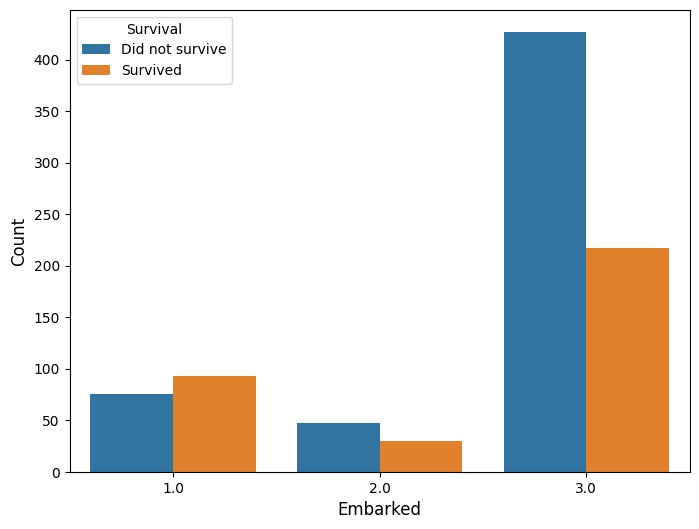

In [852]:
plt.figure(figsize=(8, 6))

sns.countplot(data=titanic, x='embarked', hue='survived')

plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survival', labels=['Did not survive', 'Survived'])

plt.show()

Since i have 2 instances that has NaN in "embarked" column, and they both survived, I am gonna Replace these NaN values with 3 because there is more chance to survive if you're embarked from Southampton

In [853]:
titanic['embarked'] = titanic['embarked'].fillna(3)

titanic[['embarked']].isnull().sum()

embarked    0
dtype: int64

In [854]:
titanic.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
deck          688
alone           0
dtype: int64

In [855]:
titanic.shape

(891, 13)

Since i have more than 75% of NaNs in "deck" column, I am just gonna drop it lol

In [856]:
titanic = titanic.drop(columns = "deck")

In [857]:
titanic.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
alone           0
dtype: int64

In [858]:
pd.unique(titanic["age"])

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Lets "play" with age data, so we can conclude sth or how can I replace NaN values in it

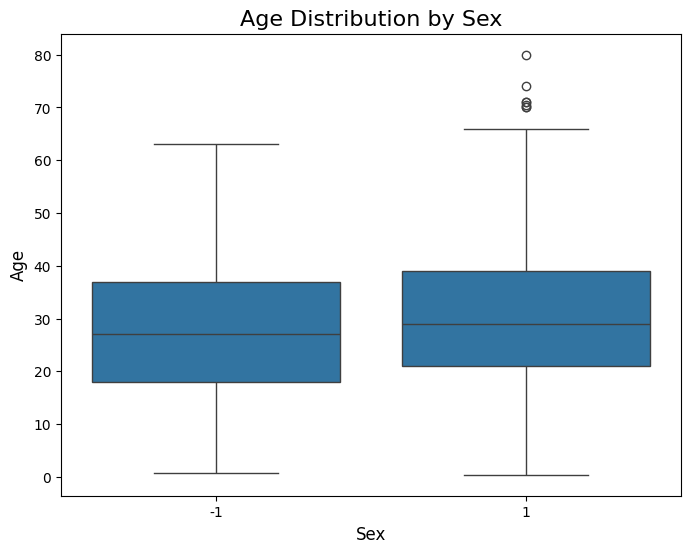

In [859]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic, x='sex', y='age')
plt.title('Age Distribution by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

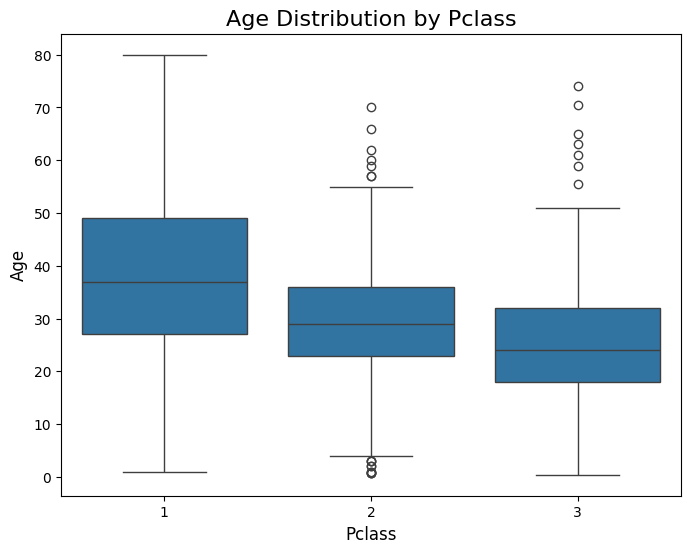

In [860]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic, x='pclass', y='age')
plt.title('Age Distribution by Pclass', fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

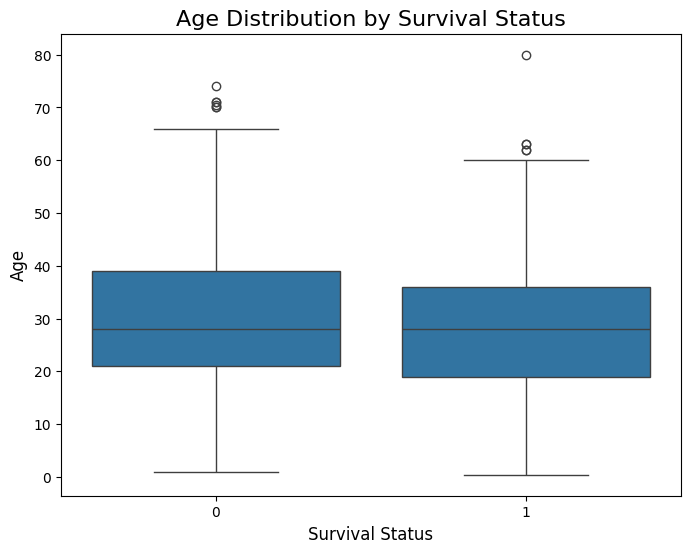

In [861]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic, x='survived', y='age')
plt.title('Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

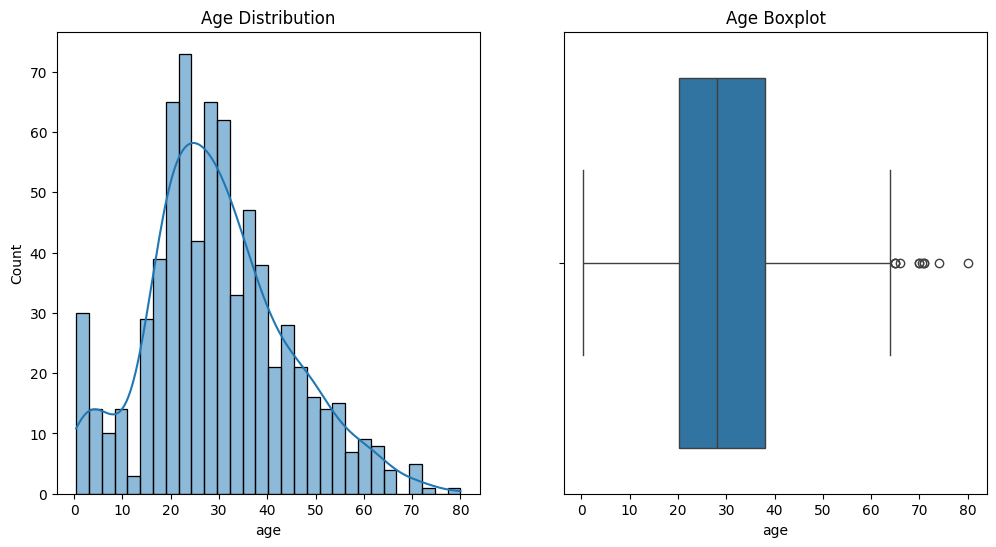

In [862]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=titanic['age'])
plt.title('Age Boxplot')

plt.show()

Filled missing age values using the median grouped by sex and pclass to account for differences in age distribution across genders and classes, ensuring a more accurate replacement.

In [863]:
titanic['age'] = titanic['age'].fillna(
    titanic.groupby(['sex', 'pclass'])['age'].transform('median')
                                       )

In [864]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [865]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,3.0,3,man,True,-1
1,1,1,-1,38.0,1,0,71.2833,1.0,1,woman,False,-1
2,1,3,-1,26.0,0,0,7.9250,3.0,3,woman,False,1
3,1,1,-1,35.0,1,0,53.1000,3.0,1,woman,False,-1
4,0,3,1,35.0,0,0,8.0500,3.0,3,man,True,1


In [866]:
pd.unique(titanic["who"])

array(['man', 'woman', 'child'], dtype=object)

In [867]:
pd.unique(titanic["adult_male"])

array([ True, False])

In [868]:
titanic['who'] = titanic['who'].replace({'man': 1, 'woman': 2, 'child': 3})

/tmp/ipykernel_3448/255511970.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['who'] = titanic['who'].replace({'man': 1, 'woman': 2, 'child': 3})


In [869]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,3.0,3,1,True,-1
1,1,1,-1,38.0,1,0,71.2833,1.0,1,2,False,-1
2,1,3,-1,26.0,0,0,7.9250,3.0,3,2,False,1
3,1,1,-1,35.0,1,0,53.1000,3.0,1,2,False,-1
4,0,3,1,35.0,0,0,8.0500,3.0,3,1,True,1


Since "adult_male" column is True for all men and False for all women, I am just gonna drop it, that is extra column we dont need

In [870]:
titanic = titanic.drop(columns="adult_male")

And we can easly see, that pclass and class are the same, so I am gonna drop pclass column also

In [871]:
titanic = titanic.drop(columns="pclass")

In [872]:
titanic.dtypes

survived       int64
sex            int64
age          float64
sibsp          int64
parch          int64
fare         float64
embarked     float64
class       category
who            int64
alone          int64
dtype: object

## Preparing data to make it trainable

One-Hot Encoding on categoric columns

In [873]:
categorical_cols = ['sex', 'embarked', 'class', 'who', 'alone']
df_encoded = pd.get_dummies(titanic, columns=categorical_cols, drop_first=True)

Normalization of numeric columns

In [874]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'sibsp', 'parch', 'fare']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

Now my data is ready for splitting/sending to data points/labels

In [875]:
X = df_encoded.drop(columns=['survived']) # data points
y = df_encoded['survived'] # labels

Splitting data, to make train/test-able

In [876]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Creating logistic regression model and training(fitting)

Creating logistic regression model and training

In [877]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Testing(predicting)

In [878]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [879]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [880]:
y_proba[:10]

array([0.1115254 , 0.22319431, 0.09232222, 0.91051706, 0.7789223 ,
       0.89831239, 0.6954044 , 0.06794348, 0.71282968, 0.86953182])

## Calculating metrics of the model

In [881]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8171641791044776
Precision: 0.8163265306122449
Recall: 0.7207207207207207
F1 Score: 0.7655502392344498


The model has an overall accuracy of 81.7%, which indicates good performance.

The precision of 81.6% shows that when the model predicts survival, it is mostly accurate.

The recall of 72% indicates that the model misses about 27.9% of actual survival cases, so there is some room for improvement in capturing all positive cases.

The F1 score is the harmonic mean of precision and recall, and it is 76.6% , indicating a balanced performance.

## Confusion matrix and coefficients

In [882]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("\n")
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[139  18]
 [ 31  80]]


True Negatives (TN) = 139:

    The model correctly predicted non-survival (0) when the actual outcome was also non-survival (0).

False Positives (FP) = 18:

    The model incorrectly predicted survival (1) when the actual outcome was non-survival (0).
    This is also known as a Type I Error.

False Negatives (FN) = 31:

    The model incorrectly predicted non-survival (0) when the actual outcome was survival (1).
    This is known as a Type II Error.

True Positives (TP) = 80:

    The model correctly predicted survival (1) when the actual outcome was also survival (1).

In [883]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]   # This is the weights learned by the logistic reg. model
})

print("\nModel coefficients:")
print(coefficients)


Model coefficients:
         Feature  Coefficient
0            age    -0.202255
1          sibsp    -0.554480
2          parch    -0.272883
3           fare     0.256129
4          sex_1    -0.776179
5   embarked_2.0    -0.171296
6   embarked_3.0    -0.530192
7        class_2    -0.221286
8        class_3    -1.413781
9          who_2     1.999756
10         who_3     2.073074
11       alone_1    -0.560290


## Conclusions about my data(mostly based on coefficients).

The logistic regression model is built on the assumption that the log-odds of the outcome (in this case, survival) are a linear combination of the input features. The sign and magnitude of each coefficient tell you how much each feature contributes to the likelihood of survival.

### Negative Coefficients

age: -0.202255
    
        As age increases, the likelihood of survival decreases. This suggests older passengers are less likely to survive.

sibsp (siblings/spouses aboard): -0.554480

    A larger number of siblings or spouses on board decreases the probability of survival. It may suggest that passengers traveling alone had a better chance of survival, possibly due to more immediate rescue options.

parch (parents/children aboard): -0.272883

    Similarly, a larger number of parents or children aboard decreases the chance of survival.

sex_1: -0.776179

    This suggests that males (sex_1) are significantly less likely to survive. This aligns with the historical pattern where women and children were given priority during evacuation.

embarked_3.0: -0.530192

    Passengers who embarked from location 3 (Southampton) had a lower chance of survival.

alone_1: -0.560290

    Passengers traveling alone were less likely to survive compared to those with family or companions. This might reflect the lack of support or priority during the disaster's chaotic evacuation.

### Positive Coefficients

fare: 0.256129

    A higher fare increases the likelihood of survival. This could reflect the fact that wealthier passengers (who paid higher fares) were more likely to have access to lifeboats or other means of survival.

who_2 and who_3 (presumably indicating females and children, respectively): 1.999756 and 2.073074

    Both "who_2" and "who_3" have positive coefficients, indicating that women (who_2) and children (who_3) were more likely to survive. This is consistent with the historical pattern where women and children were prioritized in the evacuation.

In [884]:
df_proba = pd.DataFrame({'True_Label': y_test, 'Predicted_Proba': y_proba})
print("\nA example of prediction and probability:")
print(df_proba.head())


A example of prediction and probability:
     True_Label  Predicted_Proba
709           1         0.111525
439           0         0.223194
840           0         0.092322
720           1         0.910517
39            1         0.778922
